# Breast Cancer Data Challenge

Your task is to develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell.

* Classification or regression: Classification
* Supervised or unsupervised: Supervised

## Data Description
The dataset consists of 699 cells for which you have the following features:
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
#from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

ImportError: No module named umath_tests

In [2]:
# Read in txt file as data frame
df = pd.read_csv('./breast-cancer-wisconsin.data.txt', header = None)

In [3]:
# Name the columns
cols = ['id', 'thickness', 'uniformity size', 'uniformity shape', 'adhesion', 'size', 'bare nuclei', 'chromatin', 'nucleoli', 'mitoses', 'class'] 
df.columns = cols

In [4]:
# Print first five rows
df.head()

,id,thickness,uniformity size,uniformity shape,adhesion,size,bare nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# Define class, features, IDs
classes = df['class']
features = df[['thickness', 'uniformity size', 'uniformity shape', 'adhesion', 
               'size', 'bare nuclei', 'chromatin', 'nucleoli', 'mitoses']]
ids = df['id']

[[<matplotlib.text.Text at 0x10f038290>,

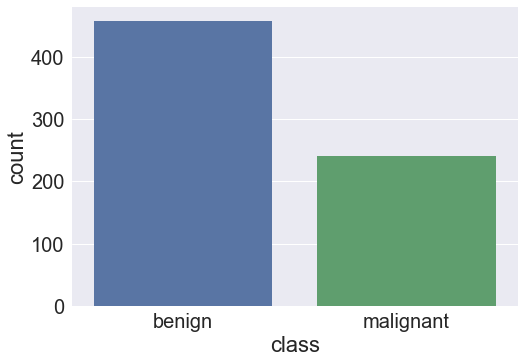

In [6]:
# Plot how many data points there are for each class
sns.set(font_scale=2)              # make the font bigger
fig = sns.countplot(classes)
fig.set(xticklabels=['benign', 'malignant'])

This is an unbalanced dataset where benign tumors occur ~2x more than malignant ones. I'll talk about how to address this later.

## Missing Values

I want to find the missing values and determine the best method for imputing them. The most important questions are: How many missing values? Where are they in the data? What is the nature of the data where the values are missing?

In [38]:
# Are there any null values? NaN are represented by '?' in data
features = features.replace('?', np.nan)        # Replace ? with NaN
print features.isnull().sum().sum()             # How many NaN in data

# Show where the null values occur
df_null = features.isnull().unstack()
print df_null[df_null]

16
bare nuclei  23     True
             40     True
             139    True
             145    True
             158    True
             164    True
             235    True
             249    True
             275    True
             292    True
             294    True
             297    True
             315    True
             321    True
             411    True
             617    True
dtype: bool


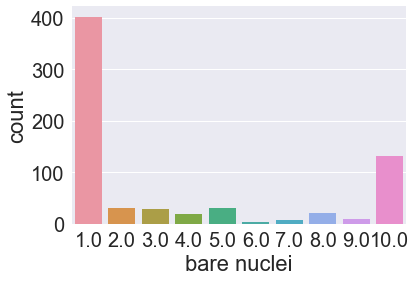

In [62]:
# See how many of each number are represented
# Need to use float because int produces error with NaN
fig = sns.countplot(features['bare nuclei'].astype(float))

There are only 16 missing values, all in the bare nuclei. By far, the most common value is 1. I'll impute the missing values with the mode of the column.

In [95]:
# Impute missing values with mode of column
X = features.fillna(features['bare nuclei'].mode()[0])
X = X.astype(int)      # Convert to integer, the bare nuclei column is string

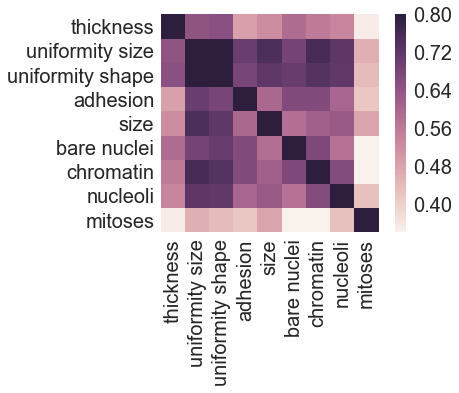

In [91]:
# Plot the correlation matrix
corrmat = X.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

## Feature engineering

Linear correlation: Uniformity of shape and uniformity of size are highly correlated. Other features are also correlated. This can cause problems in some ML algorithms.

Conclusion: Going to use PCA on the features.

In [110]:
# Use PCA on the features with whiten = True
pca = PCA(whiten=True)
X = pca.fit_transform(X)

In [104]:
print(pca.explained_variance_ratio_) 

[ 0.68900383  0.07337931  0.0608315   0.04401949  0.03882427  0.03470382
  0.02521848  0.0226243   0.01139499]


In [115]:
# Make the targets array with benign = 2 --> 0, malignant = 4 --> 1
y = classes.replace(2, 0)
y = targets.replace(4, 1)

In [ ]:
print 'Original dataset shape {}'.format(Counter(y))
sm = SMOTE()
X_res, y_res = sm.fit_sample(X, y)
print 'Resampled dataset shape {}'.format(Counter(y_res))